In [1]:
import sys
import os
data_version=os.getenv("DATA_VERSION")
print('dv env = {}'.format(data_version))
genomagic_qa_repo_path = '/home/ariel/clients/genomagic_qa'
sys.path.append('{}/src'.format(genomagic_qa_repo_path))
import redshift_queries.redshift_basic as rs
host='rndlab-genomagic-redshift.cl6ox83ermwm.us-east-1.redshift.amazonaws.com'
data_version = 'maize_benchmark_test_fix_mkrs_919_01'

dv env = None


In [2]:
samples_table = rs.get_table_name(host, data_version, 'SAMPLES')
rows = rs.simple_grouping(host, samples_table, 'analysis_method')
for r in rows:
    assert len(r) == 2
    print('{} samples count = {}'.format(r[1], r[0]))

whole_genome_sequencing samples count = 40
applied_reference_genome samples count = 11


In [3]:
haplotypes_info_table = rs.get_table_name(host, data_version, 'HAPLOTYPES_INFO')
rows = rs.get_all_results(host, 'SELECT COUNT(*) FROM {};'.format(haplotypes_info_table))
hap_markers_count = int(rows[0][0]/1000000)
rows = rs.get_all_results(host, 'SELECT COUNT(*) FROM {} WHERE chromosome=0;'.format(haplotypes_info_table))
unmapped_hap_markers_count = int(rows[0][0]/1000000)
print('in table {} there are total of {}M haplotype markers {}M of them are unmapped'.format(haplotypes_info_table, hap_markers_count, unmapped_hap_markers_count))

in table maize_benchmark_test_fix_mkrs_919_01_haplotypes_info_view there are total of 31M haplotype markers 10M of them are unmapped


In [4]:
haplotypes_samples_table = rs.get_table_name(host, data_version, 'HAPLOTYPE_SAMPLES')
sub_table_samples = 'samples AS (SELECT haplotype_idx, sample_id FROM {})'.format(haplotypes_samples_table)
sub_table_haps = 'haps AS (SELECT haplotype_idx, chromosome FROM {})'.format(haplotypes_info_table)
inner_join_sub_table = 'samples INNER JOIN haps ON samples.haplotype_idx=haps.haplotype_idx'
hapsXsamples_query = 'WITH {}, {} SELECT COUNT(*) FROM {}'.format(sub_table_samples, sub_table_haps, inner_join_sub_table)
rows = rs.get_all_results(host, '{};'.format(hapsXsamples_query))
total_haps_samples = int(rows[0][0]/1000000)
rows = rs.get_all_results(host, '{} WHERE chromosome=0;'.format(hapsXsamples_query))
unmapped_haps_samples = int(rows[0][0]/1000000)
print('There are {}M hapsXsamples {}M of them are unmapped'.format(total_haps_samples, unmapped_haps_samples))

There are 232M hapsXsamples 79M of them are unmapped


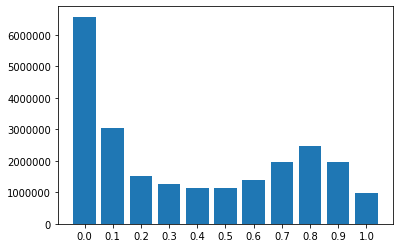

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
similarity_table = rs.get_table_name(host, data_version, 'HAPLOTYPES_SIMILARITY')
score_query = 'SELECT COUNT(*), ROUND(similarity_score,1) as sc from {} GROUP BY sc;'.format(similarity_table)

rows = rs.get_all_results(host, score_query)
assert len(rows)==11
df = pd.DataFrame.from_records(rows, columns =['Count', 'Score']).sort_values(by=['Score'])
#plt.bar(df['Count'])
#plt.show() 



height = df['Count']
bars = df['Score']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


#ax = df.plot.bar(x='Score', y='Count', rot=0, title='haplotype similarity score histogram')
#ax.set_ylabel("count");
#ax.set_xlabel("score");
#plt.show()

In [6]:
#score_len_query = 'SELECT AVG(end_position-start_position), ROUND(similarity_score,2) as sc from {} GROUP BY sc;'.format(similarity_table)
#rows = rs.get_all_results(host, score_len_query)
#df2 = pd.DataFrame.from_records(rows, columns =['mean len', 'score']).sort_values(by=['score'])
#ax1 = df2.plot.scatter(x='score',y='mean len',c='DarkBlue', title='score vs sim length')
                      